## Result Visulization for SAEA For CNN Hyperparameter Optimization

### Imports

In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

### Load data

In [3]:
# load fully trained populations (SAEA)
with open('results/fully_trained_population.pkl', 'rb') as f:
    fully_trained_population = pickle.load(f)

# load generational statistics (SAEA)
with open('results/generational_stats.pkl', 'rb') as f:
    generational_statistics = pickle.load(f)

generational_valid_acc_max = generational_statistics[0]
generational_valid_acc_min = generational_statistics[1]
generational_valid_acc_mean = generational_statistics[2]
generational_loss_target_max = generational_statistics[3]
generational_loss_target_min = generational_statistics[4]
generational_loss_target_mean = generational_statistics[5]
generational_pareto_fronts = generational_statistics[6]
generational_diversity = generational_statistics[7]
generational_surrogate_mae = generational_statistics[8]

# get generation stats of the control experiment
with open('results/generational_stats_control.pkl', 'rb') as f:
    generational_stats_control = pickle.load(f)

# get fully trained population of the control experiment
with open('results/fully_trained_population_control.pkl', 'rb') as f:
    fully_trained_population_control = pickle.load(f)

generational_valid_acc_max_control = generational_stats_control[0]
generational_valid_acc_min_control = generational_stats_control[1]
generational_valid_acc_mean_control = generational_stats_control[2]
generational_loss_target_max_control = generational_stats_control[3]
generational_loss_target_min_control = generational_stats_control[4]
generational_loss_target_mean_control = generational_stats_control[5]
generational_pareto_fronts_control = generational_stats_control[6]
generational_diversity_control = generational_stats_control[7]


### Plot Validation Accuracies and Loss Target Fitness for SAEA  
(a) and (b) show valuations for each generation including surrogate model predictions.  
(c) and (d) show valuations fully trained on the original CNN model each 1000 generations.

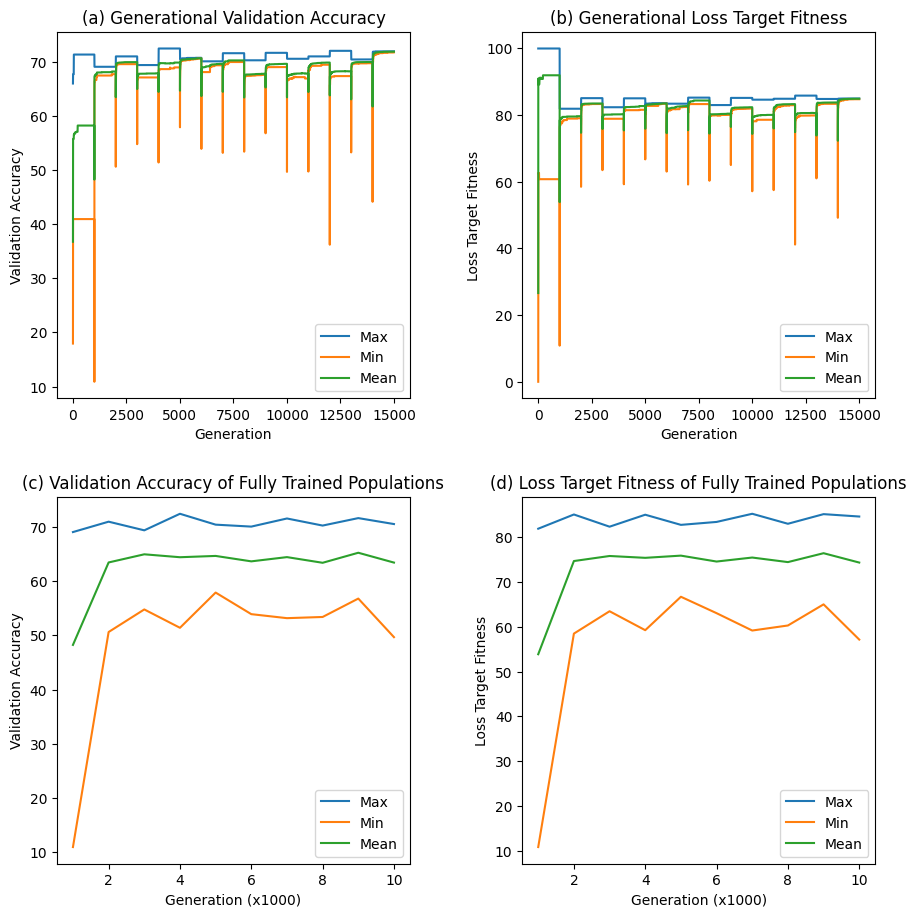

In [4]:
# plot the mean, max, and min of validation accuracies for each generation

# get data for validation accuracy
validation_means = []
validation_maxes = []
validation_mins = []
for pop in fully_trained_population:
    valid_acc = [genome.valid_acc for genome in pop]
    validation_means.append(np.mean(valid_acc))
    validation_maxes.append(np.max(valid_acc))
    validation_mins.append(np.min(valid_acc))

# get data for loss target fitness
loss_target_means = []
loss_target_maxes = []
loss_target_mins = []
for pop in fully_trained_population:
    loss_target = [genome.loss_target_fitness for genome in pop]
    loss_target_means.append(np.mean(loss_target))
    loss_target_maxes.append(np.max(loss_target))
    loss_target_mins.append(np.min(loss_target))

# create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)
# plot generational validation accuracy max, min, and mean
x = range(1, len(generational_valid_acc_max) + 1)
axs[0, 0].plot(x, generational_valid_acc_max)
axs[0, 0].plot(x, generational_valid_acc_min)
axs[0, 0].plot(x, generational_valid_acc_mean)
axs[0, 0].set_xlabel('Generation')
axs[0, 0].set_ylabel('Validation Accuracy')
axs[0, 0].set_title('(a) Generational Validation Accuracy')
axs[0, 0].legend(['Max', 'Min', 'Mean'])

# plot generational loss target max, min, and mean
x = range(1, len(generational_loss_target_max) + 1)
axs[0, 1].plot(x, generational_loss_target_max)
axs[0, 1].plot(x, generational_loss_target_min)
axs[0, 1].plot(x, generational_loss_target_mean)
axs[0, 1].set_xlabel('Generation')
axs[0, 1].set_ylabel('Loss Target Fitness')
axs[0, 1].set_title('(b) Generational Loss Target Fitness')
axs[0, 1].legend(['Max', 'Min', 'Mean'])

x = range(1, 11)
axs[1, 0].plot(x, validation_maxes[1:11])
axs[1, 0].plot(x, validation_mins[1:11])
axs[1, 0].plot(x, validation_means[1:11])
axs[1, 0].set_xlabel('Generation (x1000)')
axs[1, 0].set_ylabel('Validation Accuracy')
axs[1, 0].set_title('(c) Validation Accuracy of Fully Trained Populations')
axs[1, 0].legend(['Max', 'Min', 'Mean'])

axs[1, 1].plot(x, loss_target_maxes[1:11])
axs[1, 1].plot(x, loss_target_mins[1:11])
axs[1, 1].plot(x, loss_target_means[1:11])
axs[1, 1].set_xlabel('Generation (x1000)')
axs[1, 1].set_ylabel('Loss Target Fitness')
axs[1, 1].set_title('(d) Loss Target Fitness of Fully Trained Populations')
axs[1, 1].legend(['Max', 'Min', 'Mean'])

plt.show()

### Plot Mean Absolute Error of Surrogate Models

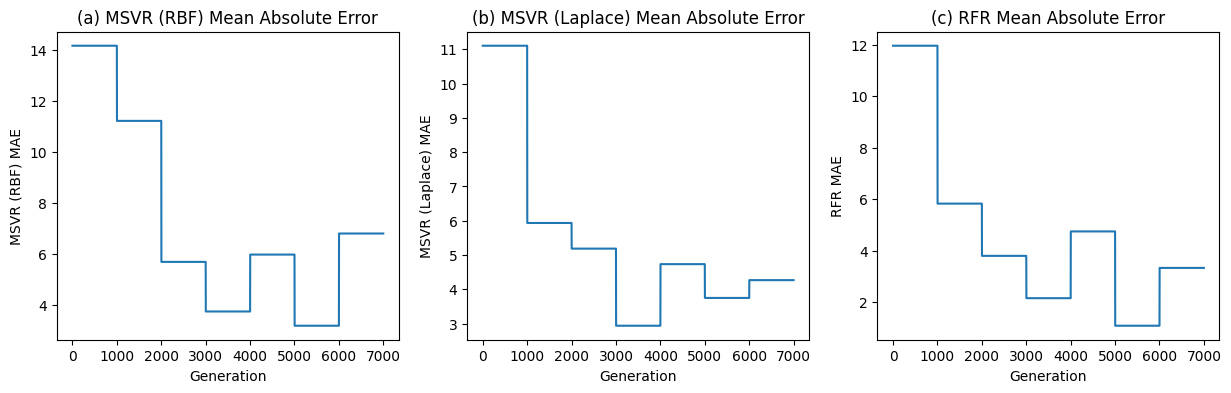

In [5]:
# create subplots
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
# fig.tight_layout(pad=5.0)

# plot surrogate MAE
axs[0].plot([mae['msvr_rbf'] for mae in generational_surrogate_mae[:7000]])
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('MSVR (RBF) MAE')
axs[0].set_title('(a) MSVR (RBF) Mean Absolute Error')

axs[1].plot([mae['msvr_laplace'] for mae in generational_surrogate_mae[:7000]])
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('MSVR (Laplace) MAE')
axs[1].set_title('(b) MSVR (Laplace) Mean Absolute Error')

axs[2].plot([mae['rfr'] for mae in generational_surrogate_mae[:7000]])
axs[2].set_xlabel('Generation')
axs[2].set_ylabel('RFR MAE')
axs[2].set_title('(c) RFR Mean Absolute Error')

# axs[1, 1].plot(generational_diversity[:10000])
# axs[1, 1].set_xlabel('Generation')
# axs[1, 1].set_ylabel('Diversity')
# axs[1, 1].set_title('(d) Generational Diversity')

plt.show()


### Generational Validation Accuracy and Loss Target Fitness for Control Group (no surrogate model)

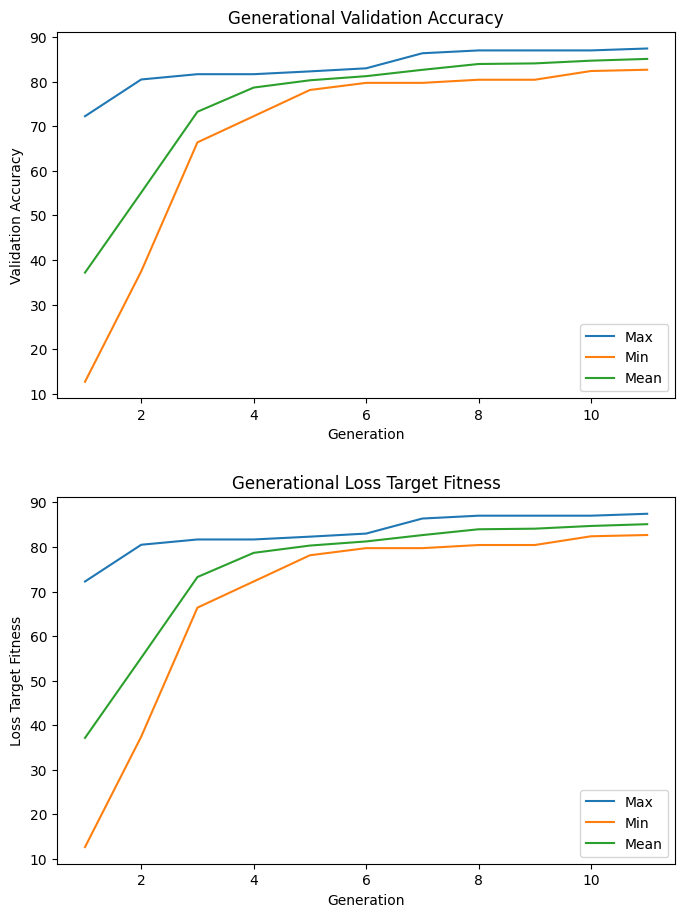

In [6]:


# plot generational validation accuracy max, min, and mean

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
fig.tight_layout(pad=5.0)


x = range(1, len(generational_loss_target_max_control) + 1)
axs[0].plot(x, generational_loss_target_max_control)
axs[0].plot(x, generational_loss_target_min_control)
axs[0].plot(x, generational_loss_target_mean_control)
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Validation Accuracy')
axs[0].set_title('Generational Validation Accuracy')
axs[0].legend(['Max', 'Min', 'Mean'])

# plot generational loss target max, min, and mean
x = range(1, len(generational_loss_target_max_control) + 1)
axs[1].plot(x, generational_loss_target_max_control)
axs[1].plot(x, generational_loss_target_min_control)
axs[1].plot(x, generational_loss_target_mean_control)
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Loss Target Fitness')
axs[1].set_title('Generational Loss Target Fitness')
axs[1].legend(['Max', 'Min', 'Mean'])
plt.show()

# # plot pareto fronts
# pareto_front = generational_stats_control[6][-1]
# population = fully_trained_population_control[-1]
# plt.figure()
# plt.plot([genome.valid_acc for genome in population], [genome.loss_target_fitness for genome in population], '.b', markersize=16, label='Non Pareto-optimal')
# plt.plot([genome.valid_acc for genome in pareto_front], [genome.loss_target_fitness for genome in pareto_front], '.r', markersize=16, label='Pareto-optimal')
# plt.xlabel('Validation Accuracy')
# plt.ylabel('Loss Target Fitness')
# plt.title('Pareto Fronts')


# # plot generational diversity
# plt.figure()
# plt.plot(generational_stats_control[7])
# plt.xlabel('Generation')
# plt.ylabel('Diversity')
# plt.title('Generational Diversity')



### Compare Generational Validation Accuracy and Loss Target Fitness for SAEA and Control Group

C:\Users\micha\AppData\Local\Temp\ipykernel_13400\1881698823.py:31: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


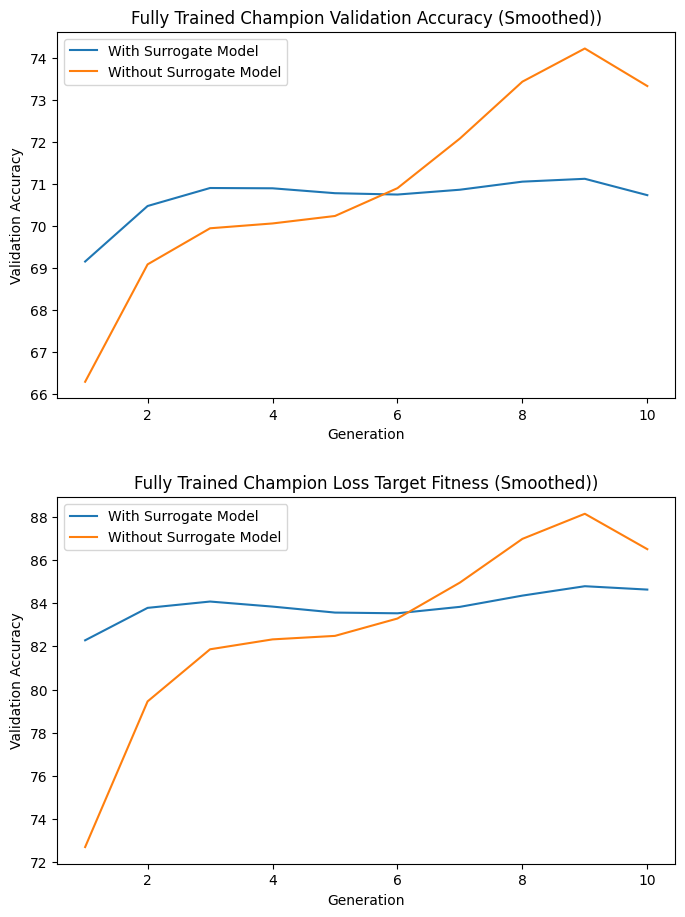

In [7]:
from scipy.signal import savgol_filter

fig, axs = plt.subplots(2, 1, figsize=(8, 10))
fig.tight_layout(pad=5.0)

# plot max validation accuracy of the control experiment vs the experiment
yhat = savgol_filter(validation_maxes[1:11], 10, 4)
yhat2 = savgol_filter(generational_valid_acc_max_control[:10], 10, 4)

x = range(1, 11)
axs[0].plot(x, yhat)
axs[0].plot(x, yhat2)
axs[0].set_xlabel('Generation')
axs[0].set_ylabel('Validation Accuracy')
axs[0].set_title('Fully Trained Champion Validation Accuracy (Smoothed))')
axs[0].legend(['With Surrogate Model', 'Without Surrogate Model'])


# plot max validation accuracy of the control experiment vs the experiment
yhat = savgol_filter(loss_target_maxes[1:11], 10, 4)
yhat2 = savgol_filter(generational_loss_target_max_control[:10], 10, 4)

x = range(1, 11)
axs[1].plot(x, yhat)
axs[1].plot(x, yhat2)
axs[1].set_xlabel('Generation')
axs[1].set_ylabel('Validation Accuracy')
axs[1].set_title('Fully Trained Champion Loss Target Fitness (Smoothed))')
axs[1].legend(['With Surrogate Model', 'Without Surrogate Model'])

fig.show()

### Get Initial and Final Pareto Fronts for SAEA and Control

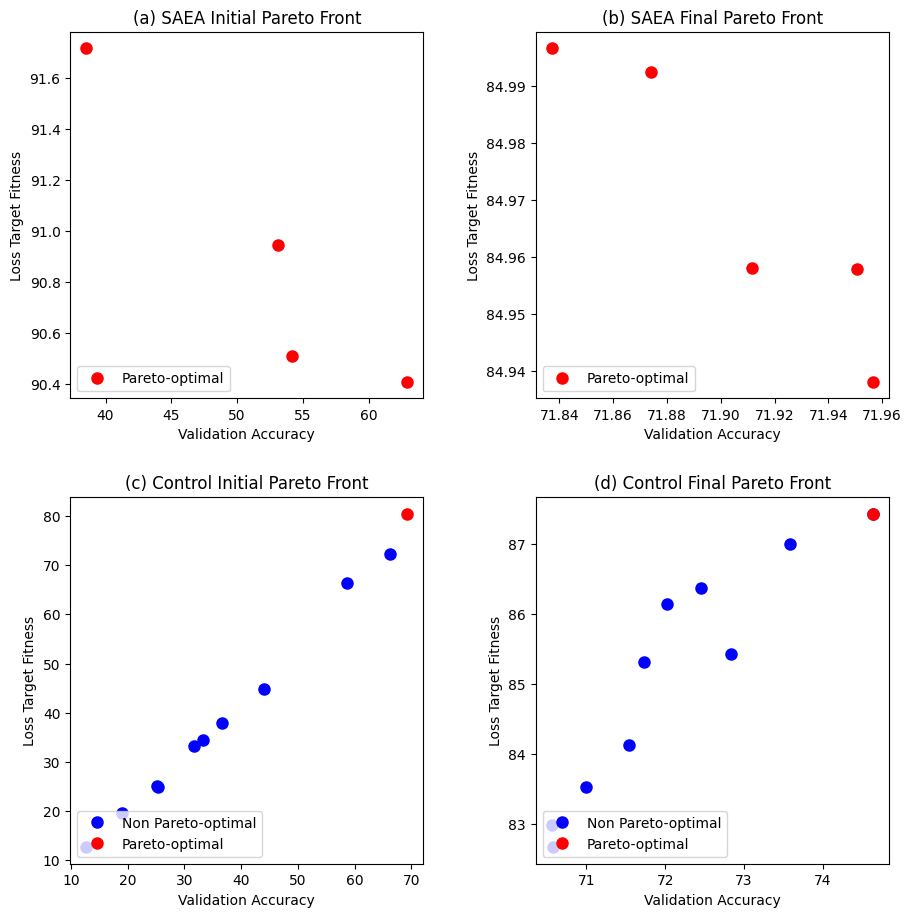

In [151]:
# open the random population
with open('results/random_training_population.pkl', 'rb') as f:
    random_training_population = pickle.load(f)

# find the pareto front of the random population
# find the pareto front
import oapackage
pareto=oapackage.ParetoDoubleLong()

for ii in range(0, len(random_training_population)):
    w=oapackage.doubleVector((random_training_population[ii].valid_acc, random_training_population[ii].loss_target_fitness))
    pareto.addvalue(w, ii)

# get initial and final pareto fronts for SARE and Control
initial_pareto_front = [random_training_population[i] for i in pareto.allindices()]
final_pareto_front = generational_pareto_fronts[-1]
initial_pareto_front_control = generational_pareto_fronts_control[1]
final_pareto_front_control = generational_pareto_fronts_control[10]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
fig.tight_layout(pad=5.0)

axs[0, 0].plot([genome.valid_acc for genome in initial_pareto_front], [genome.loss_target_fitness for genome in initial_pareto_front], '.r', markersize=16, label='Pareto-optimal')
axs[0, 0].set_xlabel('Validation Accuracy')
axs[0, 0].set_ylabel('Loss Target Fitness')
axs[0, 0].set_title('(a) SAEA Initial Pareto Front')
axs[0, 0].legend(loc=3, numpoints=1)

axs[0, 1].plot([genome.valid_acc for genome in final_pareto_front], [genome.loss_target_fitness for genome in final_pareto_front], '.r', markersize=16, label='Pareto-optimal')
axs[0, 1].set_xlabel('Validation Accuracy')
axs[0, 1].set_ylabel('Loss Target Fitness')
axs[0, 1].set_title('(b) SAEA Final Pareto Front')
axs[0, 1].legend(loc=3, numpoints=1)

population = fully_trained_population_control[0]
axs[1, 0].plot([genome.valid_acc for genome in population], [genome.loss_target_fitness for genome in population], '.b', markersize=16, label='Non Pareto-optimal')
axs[1, 0].plot([genome.valid_acc for genome in initial_pareto_front_control], [genome.loss_target_fitness for genome in initial_pareto_front_control], '.r', markersize=16, label='Pareto-optimal')
axs[1, 0].set_xlabel('Validation Accuracy')
axs[1, 0].set_ylabel('Loss Target Fitness')
axs[1, 0].set_title('(c) Control Initial Pareto Front')
axs[1, 0].legend(loc=3, numpoints=1)

population = fully_trained_population_control[-1]
axs[1, 1].plot([genome.valid_acc for genome in population], [genome.loss_target_fitness for genome in population], '.b', markersize=16, label='Non Pareto-optimal')
axs[1, 1].plot([genome.valid_acc for genome in final_pareto_front_control], [genome.loss_target_fitness for genome in final_pareto_front_control], '.r', markersize=16, label='Pareto-optimal')
axs[1, 1].set_xlabel('Validation Accuracy')
axs[1, 1].set_ylabel('Loss Target Fitness')
axs[1, 1].set_title('(d) Control Final Pareto Front')
axs[1, 1].legend(loc=3, numpoints=1)